In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Global Economy Indicators.csv')

In [3]:
# Correcting column names by stripping whitespace
df.columns = df.columns.str.strip()

In [4]:
columns_to_drop = ['Currency', 'AMA exchange rate', 
                   'IMF based exchange rate', 
                   'Changes in inventories', 
                   'Final consumption expenditure', 
                   'Mining, Manufacturing, Utilities (ISIC C-E)',
                  'Other Activities (ISIC J-P)']

df1 = df.drop(columns=columns_to_drop)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 19 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   Population                                                                                10512 non-null  int64  
 4   Per capita GNI                                                                            10512 non-null  int64  
 5   Agriculture, hunting, forestry, fishing (ISIC A-B)   

In [5]:
missing_values = df1.isnull().sum()
print(missing_values)

CountryID                                                                                     0
Country                                                                                       0
Year                                                                                          0
Population                                                                                    0
Per capita GNI                                                                                0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          121
Construction (ISIC F)                                                                         0
Exports of goods and services                                                                21
General government final consumption expenditure                                             52
Gross capital formation                                                                      52
Gross fixed capital formation (including

In [6]:
def fill_missing_values(df1):
    # Iterate over each column, except for 'CountryID', 'Country', and 'Year'
    for column in df1.columns.difference(['CountryID', 'Country', 'Year']):
        # Group by 'CountryID' to apply the filling logic per country
        df1[column] = df1.groupby('CountryID')[column].transform(lambda x: x.fillna(method='ffill').fillna(0))
        
        # Interpolate remaining missing values linearly, and fill any remaining NaNs after interpolation with 0
        df1[column] = df1.groupby('CountryID')[column].apply(
            lambda x: x.interpolate(method='linear', limit_direction='both').fillna(0)
        )
    return df1

# Apply the function to fill missing values
filled_data = fill_missing_values(df1.copy())

filled_data.head()

C:\Users\91950\AppData\Local\Temp\ipykernel_28616\2209644801.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1[column] = df1.groupby('CountryID')[column].apply(
C:\Users\91950\AppData\Local\Temp\ipykernel_28616\2209644801.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1[column] = df

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,10752971,164,8.699174e+08,46793902.0,165618722.0,112126986.0,94611818.0,94611818.0,1.551094e+09,195277226.0,370146827.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,11015857,168,9.108281e+08,48994113.0,193580300.0,121114833.0,99012350.0,99012350.0,1.675426e+09,276296480.0,387549502.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,11286753,149,8.279453e+08,44535223.0,227654380.0,108347543.0,103456794.0,103456794.0,1.498812e+09,290370350.0,352284669.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,11575305,150,8.554869e+08,46018542.0,226913554.0,109013455.0,121728433.0,121728433.0,1.508024e+09,262962880.0,364010279.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,11869879,177,1.035913e+09,55721659.0,284938449.0,128588961.0,175061875.0,175061875.0,1.778819e+09,305679151.0,440760406.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [7]:
missing_values = filled_data.isnull().sum()
print(missing_values)
filled_data.info()

CountryID                                                                                   0
Country                                                                                     0
Year                                                                                        0
Population                                                                                  0
Per capita GNI                                                                              0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          0
Construction (ISIC F)                                                                       0
Exports of goods and services                                                               0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less d

In [8]:
filled_data['CountryID'] = filled_data['CountryID'].astype('category')
filled_data['Year'] = pd.to_datetime(filled_data['Year'].astype(str) + '-01-01')
filled_data['Year'] = filled_data['Year'].dt.strftime('%Y')

In [9]:
filled_data.head()

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,10752971,164,8.699174e+08,46793902.0,165618722.0,112126986.0,94611818.0,94611818.0,1.551094e+09,195277226.0,370146827.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,11015857,168,9.108281e+08,48994113.0,193580300.0,121114833.0,99012350.0,99012350.0,1.675426e+09,276296480.0,387549502.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,11286753,149,8.279453e+08,44535223.0,227654380.0,108347543.0,103456794.0,103456794.0,1.498812e+09,290370350.0,352284669.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,11575305,150,8.554869e+08,46018542.0,226913554.0,109013455.0,121728433.0,121728433.0,1.508024e+09,262962880.0,364010279.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,11869879,177,1.035913e+09,55721659.0,284938449.0,128588961.0,175061875.0,175061875.0,1.778819e+09,305679151.0,440760406.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Define two scalers with different ranges
scaler_int = MinMaxScaler(feature_range=(0, 1000))  # For int64 columns
scaler_float = MinMaxScaler(feature_range=(0, 100000))  # For float64 columns

# Identify columns by type
int_columns = filled_data.select_dtypes(include=['int64']).columns
float_columns = filled_data.select_dtypes(include=['float64']).columns

# Normalize integer columns
filled_data[int_columns] = scaler_int.fit_transform(filled_data[int_columns])

# Normalize float columns
filled_data[float_columns] = scaler_float.fit_transform(filled_data[float_columns])

# View the normalized data
filled_data.head()

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,7.538182,0.554884,64.438326,3.760982,51.969129,3.347074,576.468421,1.273376,9.755310,5.743448,7.605653,7.420787,3.630362,6.431451,7.470182,7.419960
1,4,Afghanistan,1971,7.722549,0.571958,67.468748,3.938419,52.760867,3.615368,576.525990,1.332602,10.537273,8.126367,7.962998,7.770155,3.788722,6.733500,7.824396,7.769324
2,4,Afghanistan,1972,7.912533,0.490859,61.329284,3.578831,53.725682,3.234255,576.584133,1.392420,9.426490,8.540304,7.238874,7.062262,3.467604,6.121514,7.120268,7.061439
3,4,Afghanistan,1973,8.114899,0.495128,63.369402,3.698453,53.704705,3.254133,576.823167,1.638337,9.484426,7.734202,7.479646,7.297527,3.574606,6.324554,7.357769,7.296701
4,4,Afghanistan,1974,8.321489,0.610373,76.734323,4.480963,55.347693,3.838476,577.520886,2.356149,11.187542,8.990563,9.055624,8.838372,4.272987,7.656986,8.910406,8.837529


In [11]:
# Calculate the GDP Growth Rate
filled_data['GDP Growth Rate (%)'] = filled_data.groupby('CountryID')['Gross Domestic Product (GDP)'].pct_change() * 100

In [12]:
filled_data.head()

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),GDP Growth Rate (%)
0,4,Afghanistan,1970,7.538182,0.554884,64.438326,3.760982,51.969129,3.347074,576.468421,1.273376,9.755310,5.743448,7.605653,7.420787,3.630362,6.431451,7.470182,7.419960,NaN
1,4,Afghanistan,1971,7.722549,0.571958,67.468748,3.938419,52.760867,3.615368,576.525990,1.332602,10.537273,8.126367,7.962998,7.770155,3.788722,6.733500,7.824396,7.769324,4.708443
2,4,Afghanistan,1972,7.912533,0.490859,61.329284,3.578831,53.725682,3.234255,576.584133,1.392420,9.426490,8.540304,7.238874,7.062262,3.467604,6.121514,7.120268,7.061439,-9.111290
3,4,Afghanistan,1973,8.114899,0.495128,63.369402,3.698453,53.704705,3.254133,576.823167,1.638337,9.484426,7.734202,7.479646,7.297527,3.574606,6.324554,7.357769,7.296701,3.331649
4,4,Afghanistan,1974,8.321489,0.610373,76.734323,4.480963,55.347693,3.838476,577.520886,2.356149,11.187542,8.990563,9.055624,8.838372,4.272987,7.656986,8.910406,8.837529,21.116783


In [13]:
filled_data.fillna(0, inplace=True)

In [14]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 20 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   CountryID                                                                                 10512 non-null  category
 1   Country                                                                                   10512 non-null  object  
 2   Year                                                                                      10512 non-null  object  
 3   Population                                                                                10512 non-null  float64 
 4   Per capita GNI                                                                            10512 non-null  float64 
 5   Agriculture, hunting, forestry, fishing (ISIC 

In [15]:
filled_data.to_csv('Cleaned Global Eco Inc.csv')

In [16]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [28]:
df_gdp = pd.read_csv('Cleaned Global Eco Inc.csv')

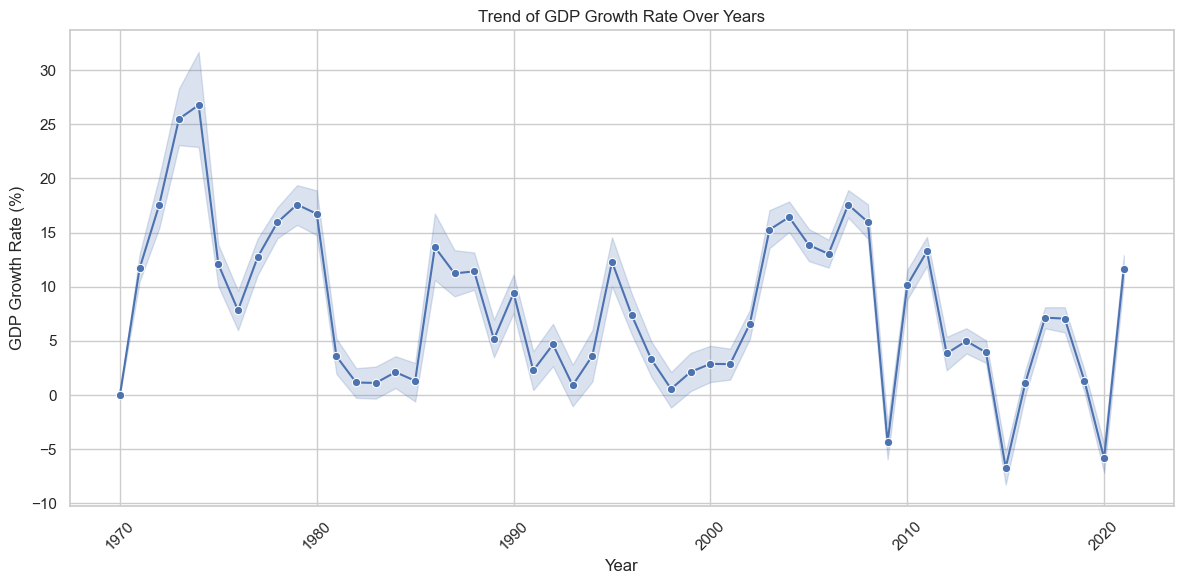

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gdp, x='Year', y='GDP Growth Rate (%)', marker='o')
plt.title('Trend of GDP Growth Rate Over Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\91950\AppData\Local\Temp\ipykernel_28616\3494440847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_gdp.drop(['Unnamed: 0', 'CountryID'], axis=1).corr()


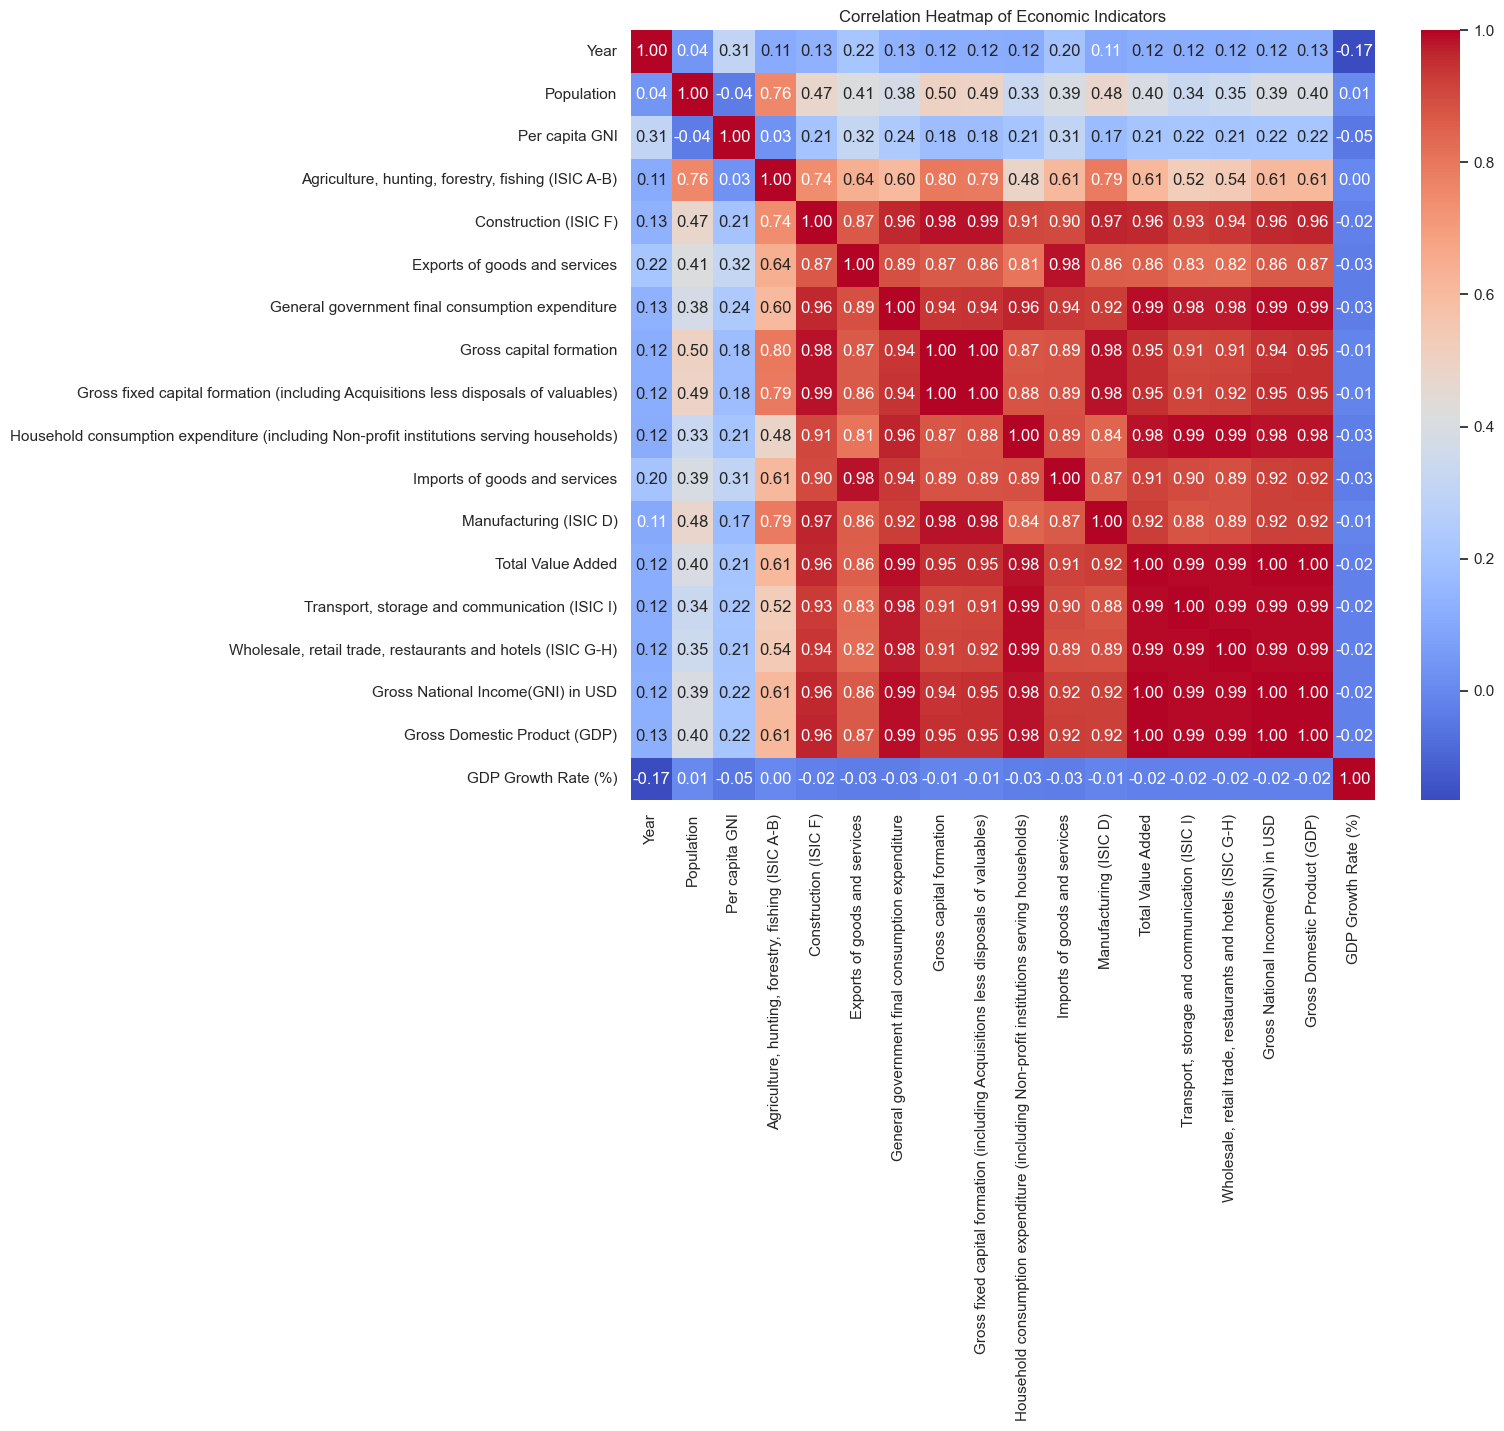

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_gdp.drop(['Unnamed: 0', 'CountryID'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()


C:\Users\91950\AppData\Local\Temp\ipykernel_28616\4132275144.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_gdp, x='GDP Growth Rate (%)', y='Country', ci=None)


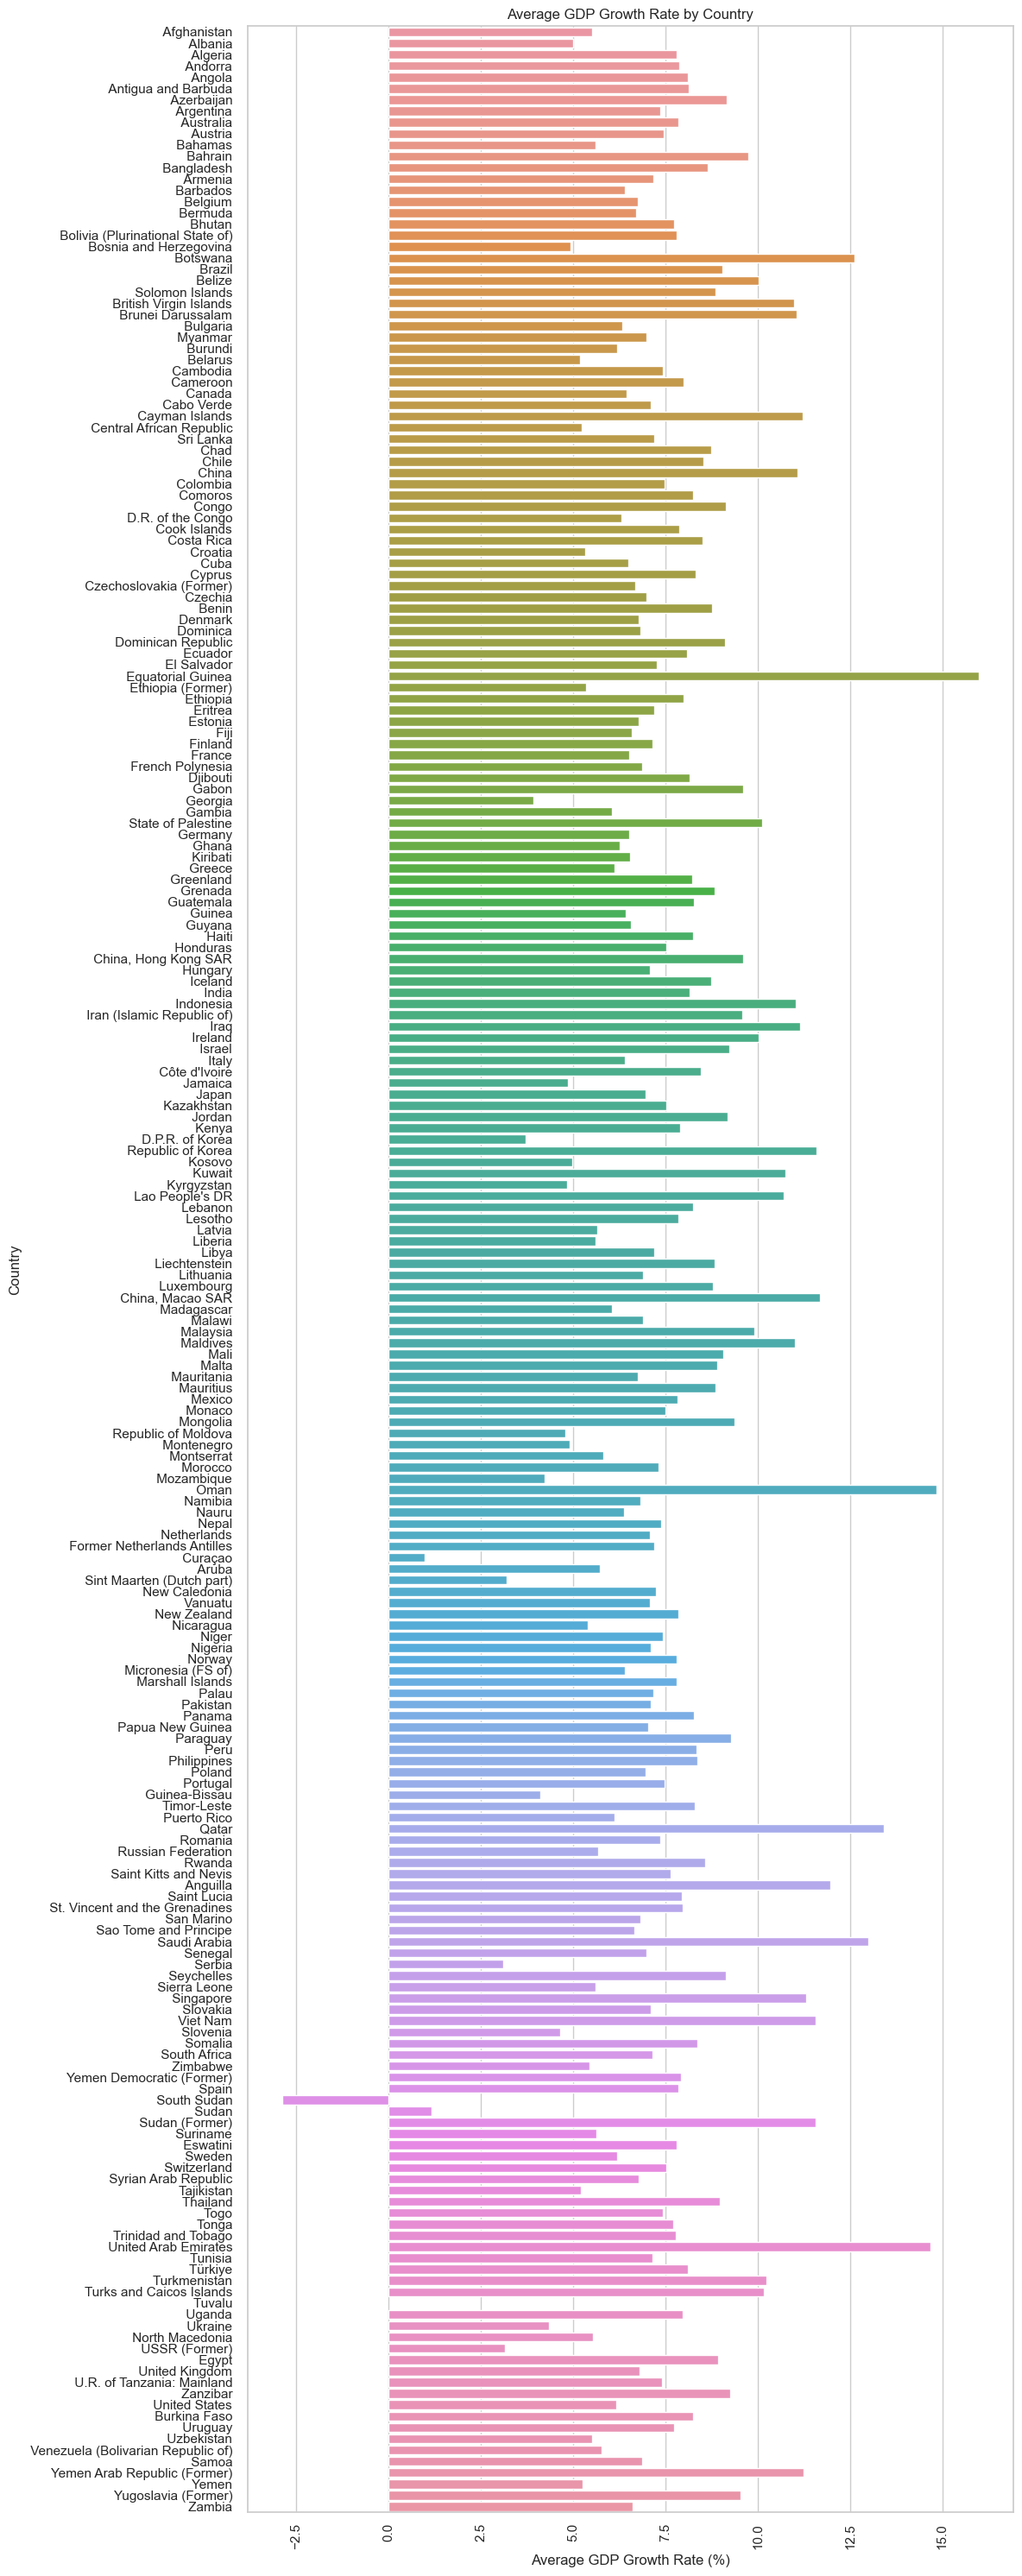

In [31]:
plt.figure(figsize=(12, 30))
sns.barplot(data=df_gdp, x='GDP Growth Rate (%)', y='Country', ci=None)
plt.title('Average GDP Growth Rate by Country')
plt.xlabel('Average GDP Growth Rate (%)')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

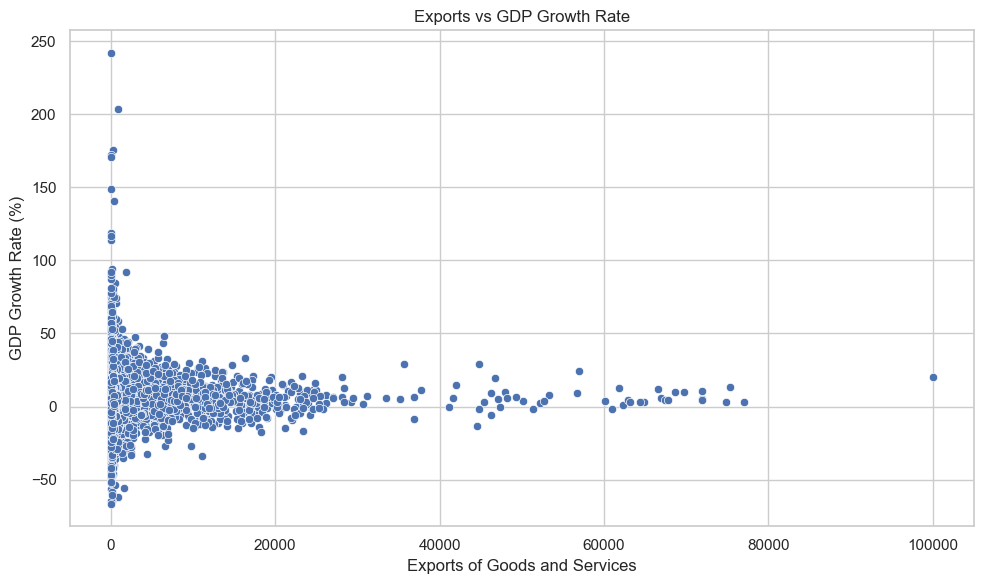

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gdp, x='Exports of goods and services', y='GDP Growth Rate (%)')
plt.title('Exports vs GDP Growth Rate')
plt.xlabel('Exports of Goods and Services')
plt.ylabel('GDP Growth Rate (%)')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import ipywidgets as widgets
from IPython.display import display


df_gdp = pd.read_csv('Cleaned Global Eco Inc.csv')

df_gdp['Country'] = df_gdp['Country'].str.strip().str.title()

country_list = df_gdp['Country'].unique()
default_country = 'India' if 'India' in country_list else country_list[0]
country_dropdown = widgets.Dropdown(
    options=country_list,
    value=default_country,  
    description='Country:',
    disabled=False,
)

def analysis(country):
    print(country)
    # Filter data for the selected country
    country_data = df_gdp[df_gdp['Country'] == country]
    vars_to_include = [
        'Year', 'GDP Growth Rate (%)', 'Per capita GNI', 'Exports of goods and services', 'Population',
        'Imports of goods and services', 'Agriculture, hunting, forestry, fishing (ISIC A-B)',
        'General government final consumption expenditure', 'Construction (ISIC F)', 'Gross Domestic Product (GDP)',
        'Transport, storage and communication (ISIC I)', 'Household consumption expenditure (including Non-profit institutions serving households)'
    ]
    multi_var_data = country_data[vars_to_include].set_index('Year')
    multi_var_data.dropna(inplace=True)

    def check_stationarity(timeseries):
        result = adfuller(timeseries, autolag='AIC')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value}')

    for col in multi_var_data.columns:
        print(f'\nColumn: {col}')
        check_stationarity(multi_var_data[col])

    train = multi_var_data.iloc[:-5]
    test = multi_var_data.iloc[-5:]

    model = VAR(multi_var_data)
    model_fit = model.fit(ic='aic')

    # Forecast the next 5 years
    forecast = model_fit.forecast(y=train.values[-model_fit.k_ar:], steps=5)
    forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)
    
    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(test['GDP Growth Rate (%)'], forecast_df['GDP Growth Rate (%)'])
    rmse = np.sqrt(mean_squared_error(test['GDP Growth Rate (%)'], forecast_df['GDP Growth Rate (%)']))
    mape = np.mean(np.abs((test['GDP Growth Rate (%)'] - forecast_df['GDP Growth Rate (%)']) / test['GDP Growth Rate (%)'])) * 100
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}%')

    # Plot actual vs forecasted GDP Growth Rate
    plt.figure(figsize=(10, 5))
    plt.plot(test['GDP Growth Rate (%)'], label='Actual GDP Growth Rate', color='blue')
    plt.plot(forecast_df['GDP Growth Rate (%)'], label='Forecasted GDP Growth Rate', color='red', linestyle='--')
    plt.title('Actual vs. Forecasted GDP Growth Rate')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.legend()
    plt.show()


interactive_analysis = widgets.interactive(analysis, country=country_dropdown)
display(interactive_analysis)


interactive(children=(Dropdown(description='Country:', index=85, options=('Afghanistan', 'Albania', 'Algeria',…